**Question 1**

ANSWER:

$x_1$ = 0.45876
$x_2$ = 1.56679

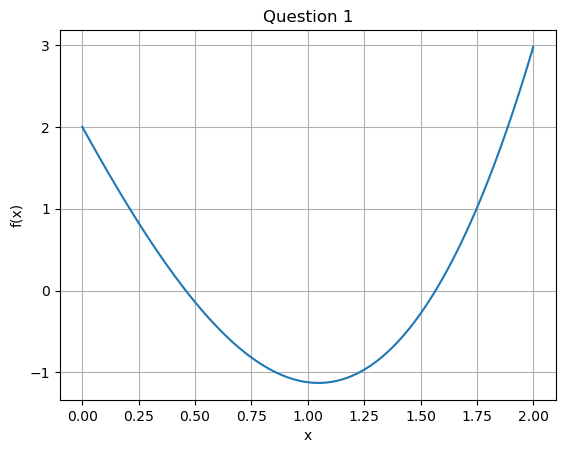

0.458757798201126
1.56679048396511


In [42]:
import sympy as sp
import numpy as np 
import matplotlib.pyplot as plt 

# Plot to see how many roots there are 
def f(x):
    return np.exp(x) + np.exp(-x) - 5 * np.sin(x)

x = np.linspace(0, 2, 100)

plt.close()
plt.plot(x, f(x)) 
plt.title("Question 1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

# Newton's Method - We know there are two roots

eps = 10 ** -5

x = sp.symbols('x')
f = sp.exp(x) + sp.exp(-x) - 5 * sp.sin(x)
f_prime = sp.diff(f, x)

# Root 1

x_old = 0.1  #initial guess 

while (f.subs(x, x_old + eps) * f.subs(x, x_old - eps) > 0):
    x_new = x_old - f.subs(x, x_old) / f_prime.subs(x, x_old)
    x_old = x_new

print(x_old)

# Root 2

x_old = 1.5  #initial guess 

while (f.subs(x, x_old + eps) * f.subs(x, x_old - eps) > 0):
    x_new = x_old - f.subs(x, x_old) / f_prime.subs(x, x_old)
    x_old = x_new

print(x_old)

**Question 2**

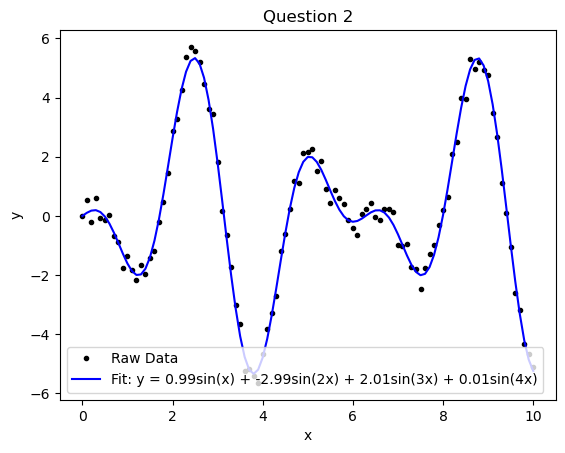

In [43]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as so

# Loading Data
x = np.loadtxt("test2data.txt", usecols=(0,))
y = np.loadtxt("test2data.txt", usecols=(1,))

# Fit 
def func(x, a, b, c, d):
    return a * np.sin(x) + b * np.sin(2 * x) + c * np.sin(3 * x) + d * np.sin(4 * x)

# Plot raw data
plt.close()
plt.plot(x, y, ".", color="black", label="Raw Data")

# Fit
params, cov = so.curve_fit(func, x, y)
a, b, c, d = params
plt.plot(x, func(x, a, b, c, d), color="blue", label=f"Fit: y = {a:.2f}sin(x) + {b:.2f}sin(2x) + {c:.2f}sin(3x) + {d:.2f}sin(4x)")

plt.title("Question 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Question 3**

ANSWER: 

$I$ = 0.436031

This is correct to six significant figures because if you print out the Simpson's rule approximation for 50 high-N values, 0.436031 is very consistently the first 6 significant digits. 

In [44]:
import numpy as np

def simpsons_rule( f, a, b, N ):
    delta_x = ( b - a ) / N
    # for loop 1
    summation1 = 0
    for i in range( 1, N ):
        x_i = a + i * delta_x
        summation1 += f( x_i )
    # for loop 2
    summation2 = 0
    for i in range( 1, N + 1 ):
        x_im1 = a + ( i - 1 ) * delta_x
        x_i = a + i * delta_x
        summation2 += f( ( x_im1 + x_i ) / 2 )
    # part of Simpson's in brackets
    brackets = f( a ) + f(  b) + 2 * summation1 + 4 * summation2
    # final result
    return ( delta_x / 6 ) * brackets

def f( x ):
    return np.sin( x ** 3 )

a = 0
b = 5

print("")
for N in range( 1950, 2000 ):
    approx = simpsons_rule( f, a, b, N )
    print( f"{N}    {approx}" )


1950    0.43603143196999034
1951    0.43603143198009736
1952    0.43603143199017697
1953    0.43603143200023253
1954    0.4360314320102625
1955    0.4360314320202643
1956    0.4360314320302429
1957    0.43603143204019545
1958    0.4360314320501219
1959    0.4360314320600241
1960    0.4360314320699006
1961    0.43603143207975226
1962    0.4360314320895755
1963    0.43603143209937845
1964    0.4360314321091559
1965    0.436031432118906
1966    0.43603143212863105
1967    0.436031432138334
1968    0.4360314321480116
1969    0.43603143215766815
1970    0.4360314321672917
1971    0.43603143217689505
1972    0.4360314321864744
1973    0.4360314321960311
1974    0.43603143220556034
1975    0.4360314322150669
1976    0.436031432224549
1977    0.4360314322340082
1978    0.4360314322434427
1979    0.43603143225285285
1980    0.43603143226223906
1981    0.43603143227160296
1982    0.4360314322809428
1983    0.43603143229026325
1984    0.4360314322995521
1985    0.43603143230882263
1986    0.4360

**Question 4**

ANSWER: 

x(10) = 3.1809

This is correct to 5 significant figures because if you print out the RK4 result for x(10) for several high N values, 3.1809 is very consistently the first 5 significant digits.

1    5.394204240336021
2    0.8123075140073144
3    -0.8552724872210518
4    1.4081393245747829
5    3.824616848743871
6    3.4231345613444164
7    3.145945859369125
8    0.9718978058186141
9    1.9435997654565194
10    2.7119788552272035
11    1.7176291784025322
12    2.2989080533329997
13    2.454763143021686
14    2.6143221438170947
15    3.14399258634835
16    4.121226703059241
17    2.6185005233167895
18    2.025206792313072
19    1.5771400175855357

N = 1050


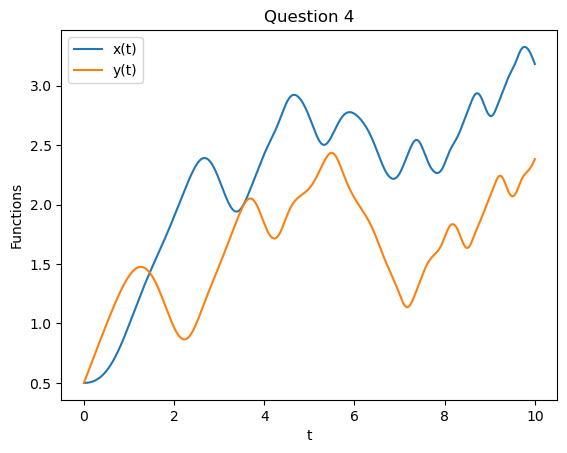

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define system of ODEs
def f1(t, x, y):
    return np.sin(y * t)

def f2(t, x, y):
    return np.cos(x * t)

# RK4
def rk4(t0, tf, N):
    h = (tf - t0) / N
    t = np.zeros(N + 1)
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)

    # Initial conditions
    t[0] = t0
    x[0] = 0.5
    y[0] = 0.5

    # iteration
    for i in range(N):
        th = t[i] + h / 2

        k1x = f1(t[i], x[i], y[i])
        k1y = f2(t[i], x[i], y[i])

        k2x = f1(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)
        k2y = f2(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)

        k3x = f1(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)
        k3y = f2(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)

        k4x = f1(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)
        k4y = f2(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)

        x[i + 1] = x[i] + (h / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        y[i + 1] = y[i] + (h / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
        t[i + 1] = t[i] + h

    return t, x, y

# Parameters
t0 = 0.0
tf = 10.0

# Finding a decent N value

for i in range(1, 20):
    t, x, y = rk4(t0, tf, i)
    print(f"{i}    {x[-1]}")

print ("\nN = 1050")
N = 1050
t, x, y = rk4(t0, tf, N)

# Plot
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.xlabel('t')
plt.ylabel('Functions')
plt.legend()
plt.title('Question 4')
plt.show()
